In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [38]:
columns=['fsa_id','name','address','postcode','easting','northing','latitude','longitude','local_authority']
df=pd.read_csv("open_pubs.csv",names=columns)

In [39]:
df.head()

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,\N,\N,Babergh
4,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,\N,\N,Babergh


In [40]:
df.shape

(51331, 9)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51331 entries, 0 to 51330
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fsa_id           51331 non-null  int64 
 1   name             51331 non-null  object
 2   address          51331 non-null  object
 3   postcode         51331 non-null  object
 4   easting          51331 non-null  int64 
 5   northing         51331 non-null  int64 
 6   latitude         51331 non-null  object
 7   longitude        51331 non-null  object
 8   local_authority  51331 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.5+ MB


In [42]:
df.describe()

,fsa_id,easting,northing
count,51331.000000,51331.000000,5.133100e+04
mean,299395.371861,429857.397810,2.271941e+05
std,169362.451341,98559.032868,7.277388e+05
min,22.000000,78110.000000,-5.527598e+06
25%,167750.000000,361449.000000,1.792440e+05
50%,303719.000000,428772.000000,2.872490e+05
75%,438957.500000,509796.500000,4.089420e+05
max,597137.000000,655277.000000,1.209661e+06


In [43]:
df.isnull().sum()

fsa_id             0
name               0
address            0
postcode           0
easting            0
northing           0
latitude           0
longitude          0
local_authority    0
dtype: int64

In [45]:
df=df.replace("\\N",np.nan)

In [46]:
df.head()

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,NaN,NaN,Babergh
4,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,NaN,NaN,Babergh


In [47]:
df.dropna(axis=0,inplace=True)

In [48]:
df.shape

(50564, 9)

In [92]:
df.to_csv("pubs.csv")

# Univariate Analysis

In [49]:
len(df['fsa_id'].unique())

50564

Since it is unique for each pub.

In [53]:
df['name']

0                                      Anchor Inn
1                              Ark Bar Restaurant
2                                       Black Boy
5                                    Brewers Arms
6                                    Bristol Arms
                           ...                   
51326    Wrexham & District War Memorial Club Ltd
51327                   Wrexham Lager Social Club
51328           Wrexham Rail Sports & Social Club
51329                          Wrexham Rugby Club
51330                                       Y Tai
Name: name, Length: 50564, dtype: object

In [54]:
df['address']

0              Upper Street, Stratford St Mary, COLCHESTER
1        Ark Bar And Restaurant, Cattawade Street, Bran...
2        The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...
5        The Brewers Arms, Bower House Tye, Polstead, C...
6                           Bristol Hill, Shotley, IPSWICH
                               ...                        
51326    Wrexham War Memorial Club Farndon Street, Wrex...
51327                   1 - 3 Union Road, Wrexham, Wrexham
51328    Sports And Social Club, 44 Brook Street, Wrexh...
51329    Wrexham Rugby Club Bryn Estyn Road, Wrexham, W...
51330         Y Tai Railway Road, Brymbo, Wrexham, Wrexham
Name: address, Length: 50564, dtype: object

In [56]:
df['postcode'].unique()

array(['CO7 6LW', 'CO11 1RH', 'CO10 2EA', ..., 'LL13 7LU', 'LL13 9TY',
       'LL11 5EA'], dtype=object)

In [58]:
#converting type of lattitude and longitude from object to float.
df.latitude=df.latitude.astype(float)
df.longitude=df.longitude.astype(float)

In [60]:
df.dtypes

fsa_id               int64
name                object
address             object
postcode            object
easting              int64
northing             int64
latitude           float64
longitude          float64
local_authority     object
dtype: object

In [64]:
df['local_authority'].value_counts()

County Durham         680
Leeds                 611
Cornwall              557
Wiltshire             544
Kirklees              524
                     ... 
Orkney Islands         15
East Renfrewshire      12
Na h-Eileanan Siar     11
Isles of Scilly        10
West Lothian            2
Name: local_authority, Length: 360, dtype: int64

In [93]:
#Top 10 Local authority this pubs falls under.
df['local_authority'].value_counts()[:10]

County Durham        680
Leeds                611
Cornwall             557
Wiltshire            544
Kirklees             524
City of Edinburgh    506
Birmingham           494
Buckinghamshire      485
Bradford             478
Northumberland       446
Name: local_authority, dtype: int64

<Axes: >

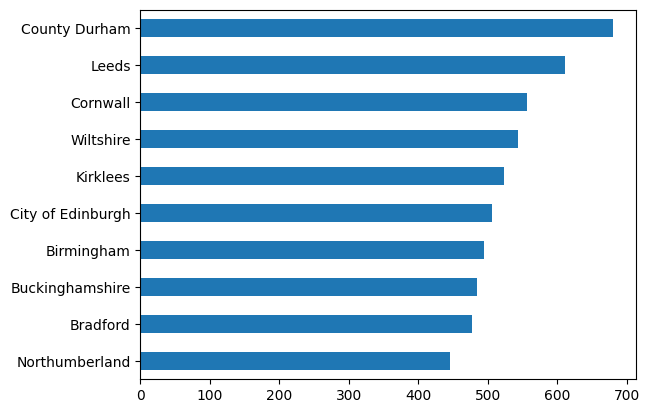

In [73]:
df['local_authority'].value_counts()[:10].sort_values().plot(kind='barh')

In [91]:
latlon = []
for i in range(5):
    latlon.append((df.iloc[i,6],df.iloc[i,7]))
map=folium.Map( location=[52.667989, -1.464582], zoom_start=6 )
for coord in latlon:
    folium.Marker(location=[ coord[0], coord[1] ], fill_color='#43d9de',radius=6).add_to(map)
map